# Ejemplo de Machine Learning con Python - Selección de atributos

*Esta notebook fue creada originalmente como un blog post por [Raúl E. López Briega](http://relopezbriega.com.ar/) en [Matemáticas, Analisis de datos y Python](http://relopezbriega.github.io). El contenido esta bajo la licencia BSD.*

<img alt="Machine Learning" title="Machine Learning" src="http://relopezbriega.github.io/images/machine-learning.jpg">

## Introducción

Continuando donde nos quedamos en el artículo anterior [Ejemplo de Machine Learning - preprocesamiento y exploración](http://relopezbriega.github.io/blog/2016/04/08/ejemplo-de-machine-learning-con-python-preprocesamiento-y-exploracion/); ahora es tiempo de ingresar en el terreno de la [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection).


## ¿En qué consiste la selección de atributos?

La [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection) es el proceso por el cual seleccionamos un subconjunto de atributos (representados por cada una de las columnas en un [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) de forma tabular) que son más relevantes para la construcción del modelo predictivo sobre el que estamos trabajando. 

Este proceso, no se debe confundir con el de [reducción de dimensiones](https://en.wikipedia.org/wiki/Dimensionality_reduction); si bien ambos procesos buscan reducir el número de atributos en nuestro [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos); este último lo hace por medio de la creación de nuevos atributos que son combinaciones de los anteriores; mientras que en el proceso de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection), intentamos incluir y excluir los atributos prácticamente sin modificarlos.

El proceso de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection) es tanto un arte como una ciencia, en donde el conocimiento sobre el problema y la intuición son sumamente importantes. El objetivo de la [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection) es triple: mejorar la capacidad predictiva de nuestro modelo, proporcionando modelos predictivos más rápidos y eficientes, y proporcionar una mejor comprensión del proceso subyacente que generó los datos. Los métodos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection) se pueden utilizar para identificar y eliminar los atributos innecesarios, irrelevantes y redundantes que no contribuyen a la exactitud del modelo predictivo o incluso puedan disminuir su precisión. 


## Beneficios de la selección de atributos

Uno de los principales beneficios de la [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection) esta plasmado por la famosa frase ***"Menos es más"*** del arquitecto [Ludwig Mies van der Rohe](https://es.wikipedia.org/wiki/Ludwig_Mies_van_der_Rohe), precursor del [minimalismo](https://es.wikipedia.org/wiki/Minimalismo). Menos atributos son deseables ya que reduce la complejidad del modelo, y un modelo más simple es más fácil de entender y explicar. 

Otros beneficios adicionales que nos proporciona una buena [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection) antes de comenzar con el armado del modelo, son:

* **Reduce el [sobreentrenamiento](https://es.wikipedia.org/wiki/Sobreajuste)**: Menos datos redundantes significan menos oportunidades para tomar decisiones sobre la base de ruido.
* **Mejora la precisión**: Menos datos engañosos se convierten en una mejora en la exactitud del modelo.
* **Reduce el tiempo de entrenamiento**: Menos datos significa que los algoritmos aprenden más rápidamente.


## Selección de atributos univariante o multivariante

Una cosa que no debemos pasar por alto en el proceso de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection), es la relación que puede existir entre ellos. Es decir que debemos considerar seleccionar o eliminar un atributo en forma individual ([univariante](https://en.wikipedia.org/wiki/Univariate_analysis)) o un un grupo de atributos en forma conjunta ([multivariante](https://es.wikipedia.org/wiki/An%C3%A1lisis_multivariante)). Esto también va a depender del problema con el que estemos tratando y del modelo que elijamos. Por ejemplo si elegimos como modelo un [clasificador bayesiano ingenuo](https://es.wikipedia.org/wiki/Clasificador_bayesiano_ingenuo), el modelo asume que cada atributo es independiente del resto, por lo tanto, podríamos utilizar un enfoque [univariante](https://en.wikipedia.org/wiki/Univariate_analysis) sin problemas; en cambio si elegimos como modelo una [red neuronal](https://es.wikipedia.org/wiki/Red_neuronal_artificial), este último no asume la independencia de los atributos, sino que utiliza todas la que dispone; por lo tanto aquí deberíamos seguir un enfoque [multivariante](https://es.wikipedia.org/wiki/An%C3%A1lisis_multivariante) para seleccionar los atributos.


## Algoritmos para selección de atributos

Podemos encontrar dos clases generales de algoritmos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection): los métodos de filtrado, y los métodos empaquetados.

### Métodos de filtrado

Estos métodos aplican una medida estadística para asignar una puntuación a cada atributo. Los atributos luego son clasificados de acuerdo a su puntuación y son, o bien seleccionados para su conservación o eliminados del conjunto de datos. Los métodos de filtrado son a menudo [univariantes](https://en.wikipedia.org/wiki/Univariate_analysis) y consideran a cada atributo en forma independiente, o con respecto a la variable dependiente.

Ejemplos de estos métodos son: [prueba de Chi cuadrado](https://es.wikipedia.org/wiki/Prueba_%CF%87%C2%B2), [prueba F de Fisher](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher), [ratio de ganancia de información](https://en.wikipedia.org/wiki/Information_gain_ratio) y los [coeficientes de correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n).

### Métodos empaquetados

Estos métodos consideran la selección de un conjunto de atributos como un problema de búsqueda, en donde las diferentes combinaciones son evaluadas y comparadas. Para hacer estas evaluaciones se utiliza un modelo predictivo y luego se asigna una puntuación a cada combinación basada en la precisión del modelo.

Un ejemplo de este método es el algoritmo de eliminación recursiva de atributos.


## Ejemplo

Pasamos ahora a ver como podemos aplicar todo esto al caso en el que veníamos trabajando en el el [artículo anterior](http://relopezbriega.github.io/blog/2016/04/08/ejemplo-de-machine-learning-con-python-preprocesamiento-y-exploracion/). Pero antes, terminemos con algunas tareas de preprocesamiento adicionales.

In [1]:
# <!-- collapse=True -->
# Importando las librerías que vamos a utilizar
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier

# graficos incrustados
%matplotlib inline

# parametros esteticos de seaborn
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8, 4)})

In [2]:
# importando el dataset preprocesado.
ONG_data = pd.read_csv('LEARNING_procesado.csv', header=0)

# Agregando la columna AGE2
AGE2 = pd.cut(ONG_data['AGE'], range(0, 100, 10))
ONG_data['AGE2'] = AGE2

In [3]:
# Eliminar columnas con donaciones superiores a 60 (atípicos)
ONG_data = ONG_data[ONG_data.DONOR_AMOUNT < 60]

In [4]:
# Convertir datos categoricos a numericos
tipos = ONG_data.columns.to_series().groupby(ONG_data.dtypes).groups
ctext = tipos[np.dtype('object')]

for c in ctext:
    ONG_data[c], _ = pd.factorize(ONG_data[c])

ONG_data['AGE2'], _ = pd.factorize(ONG_data['AGE2'])

Con estas manipulaciones lo que hicimos es cargar en memoria el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) que prepocesamos anteriormente, le agregamos la nueva columna AGE2, ya que es mejor tener la edad agrupada en rangos en lugar de individualmente, luego eliminamos los [valores atípicos](https://es.wikipedia.org/wiki/Valor_at%C3%ADpico) que habíamos detectado; y por último, reemplazamos con su equivalente numérico a todas las [variables categóricas](http://relopezbriega.github.io/blog/2016/02/29/analisis-de-datos-categoricos-con-python/); ya que para los algoritmos de [Scikit-learn](http://scikit-learn.org/stable/) es mucho más eficiente trabajar con variables numéricas.

Ahora sí, ya estamos en condiciones de poder comenzar a aplicar algunos de los algoritmos de [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection), comencemos con un simple algoritmo [univariante](https://en.wikipedia.org/wiki/Univariate_analysis) que aplica el método de filtrado. Para esto vamos a utilizar los objetos `SelectKBest` y `f_classif` del paquete `sklearn.feature_selection`.

In [5]:
# Separamos las columnas objetivo
donor_flag = ONG_data['DONOR_FLAG']
donor_amount = ONG_data['DONOR_AMOUNT']
indice = ONG_data['IDX']

In [6]:
# Aplicando el algoritmo univariante de prueba F.
k = 15  # número de atributos a seleccionar
entrenar = ONG_data.drop(['DONOR_FLAG', 'DONOR_AMOUNT', 'IDX'], axis=1)
columnas = list(entrenar.columns.values)
seleccionadas = SelectKBest(f_classif, k=k).fit(entrenar, donor_flag)
atrib = seleccionadas.get_support()
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['ODATEDW',
 'PEPSTRFL',
 'HVP3',
 'CARDPROM',
 'NUMPROM',
 'RAMNT_8',
 'RAMNT_16',
 'NGIFTALL',
 'CARDGIFT',
 'LASTGIFT',
 'LASTDATE',
 'FISTDATE',
 'AVGGIFT',
 'RFA_2F',
 'RFA_2A']

Como podemos ver, el algoritmo nos seleccionó la cantidad de atributos que le indicamos; en este ejemplo decidimos seleccionar solo 15; obviamente, cuando armemos nuestro modelo final vamos a tomar un número mayor de atributos.

### ¿Cómo funciona?

Este algoritmo selecciona a los mejores atributos basándose en una prueba estadística [univariante](https://en.wikipedia.org/wiki/Univariate_analysis). Al objeto `SelectKBest` le pasamos la prueba estadística que vamos a a aplicar, en este caso una [prueba F](https://es.wikipedia.org/wiki/Prueba_F_de_Fisher) definida por el objeto `f_classif`, junto con el número de atributos a seleccionar. El algoritmo va a aplicar la prueba a todos los atributos y va a seleccionar los que mejor resultado obtuvieron.

Ahora veamos como funciona el algoritmo de **Eliminación Recursiva de atributos**. Para este caso, vamos a utilizar como nuestro modelo predictivo el algoritmo [ExtraTreesClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html).

In [7]:
# Algoritmo de Eliminación Recursiva de atributos con ExtraTrees
modelo = ExtraTreesClassifier()
era = RFE(modelo, 15)  # número de atributos a seleccionar
era = era.fit(entrenar, donor_flag)

In [8]:
# imprimir resultados
atrib = era.support_
atributos = [columnas[i] for i in list(atrib.nonzero()[0])]
atributos

['OSOURCE',
 'ZIP',
 'VIETVETS',
 'WWIIVETS',
 'POP901',
 'HV1',
 'PEC2',
 'TPE13',
 'EIC4',
 'EIC14',
 'VC2',
 'CARDPROM',
 'MINRDATE',
 'MAXRDATE',
 'TIMELAG']

### ¿Cómo funciona?

En este algoritmo, dado un modelo predictivo que asigna un coeficiente de importancia a cada atributo (como ExtraTreesClassifier), el objetivo de la *Eliminación Recursiva de atributos* es ir seleccionado en forma recursiva un número cada vez más pequeño de atributos. Primero comienza con todos los atributos del [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos) y luego en cada pasada va eliminando aquellos que tenga el menor coeficiente de importancia hasta alcanzar el número de atributos deseado.

Si vemos los 15 atributos seleccionados por este otro algoritmo, existen muchas diferencias con los que selecciono el modelo anterior; en general, la Eliminación Recursiva de atributos suele ser mucho más precisa, pero también consume mucho más tiempo y recursos, ya que requiere que entrenemos a un *modelo predictivo* para poder obtener sus resultados.

Por último, también podríamos utilizar ese coeficiente de importancia que nos proporciona el modelo como una guía adicional para refinar nuestra [selección de atributos](https://en.wikipedia.org/wiki/Feature_selection).

In [9]:
# Importancia de atributos.
modelo.fit(entrenar, donor_flag)
modelo.feature_importances_[:15]

array([  2.59616058e-03,   3.03252110e-03,   2.71464477e-03,
         2.51952243e-03,   2.34433609e-03,   6.01722535e-04,
         4.82782938e-04,   2.24732045e-03,   2.07872966e-03,
         1.29249803e-03,   1.17189225e-03,   9.77218420e-06,
         6.12421074e-04,   5.79137133e-05,   2.40594405e-03])

In [10]:
# 15 coeficientes más altos
np.sort(modelo.feature_importances_)[::-1][:15]

array([ 0.00369165,  0.00353173,  0.00348298,  0.00336095,  0.00331946,
        0.00331828,  0.00331345,  0.00326505,  0.00316758,  0.00316587,
        0.00313431,  0.00311334,  0.00310065,  0.00307309,  0.00304518])

Analicemos algunos de estos atributos en forma individual para tener una idea de cuanto puede ser que aporten a la exactitud del modelo. Podríamos comparar por ejemplo, el promedio de donaciones que podríamos obtener con este atributo contra el promedio de todo el [dataset](https://es.wikipedia.org/wiki/Conjunto_de_datos). Tomemos por ejemplo al atributo LASTGIFT que representa el importe de la última donación que realizó cada persona incluida en el conjunto de datos. En principio parece lógico que este atributo sea significativo para el modelo, ya que si donó en el pasado, hay bastantes posibilidades de que vuelva a donar en esta oportunidad. 

In [11]:
# Probabilidad de ser donante de todo el dataset.
prob_gral = (ONG_data[ONG_data.DONOR_AMOUNT > 0]['DONOR_AMOUNT'].count()  \
                   / ONG_data['DONOR_AMOUNT'].count()) * 100.0
prob_gral 

5.0377358490566033

In [12]:
# Probabilidad de realizar donanción con LASTGIFT <= 10
lastgift10 = (ONG_data[(ONG_data.DONOR_AMOUNT > 0) &
                            (ONG_data.LASTGIFT <= 10)]['DONOR_AMOUNT'].count()  \
      / ONG_data[ONG_data.LASTGIFT <= 10]['DONOR_AMOUNT'].count()) * 100.0
lastgift10

6.9347104389524157

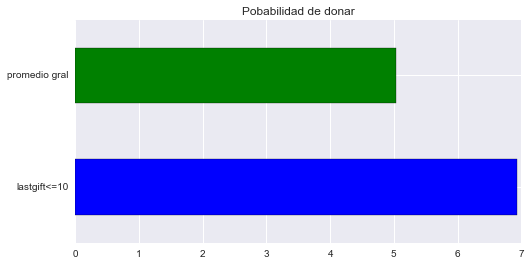

In [13]:
# graficando los resultados
lastgift = pd.Series({'promedio gral': prob_gral, 'lastgift<=10': lastgift10})
plot=lastgift.plot(kind='barh', 
                   color=['blue', 'green']).set_title('Pobabilidad de donar')

Este último gráfico nos muestra claramente que con un valor del atributo LASTGIFT menor o igual a 10 las probabilidades de que esa persona realice una donación mejoran, pero veamos que pasa con el importe de la donación.

In [14]:
# importe promedio de donación general
donacion_prom = ONG_data[ONG_data.DONOR_AMOUNT > 0]['DONOR_AMOUNT'].mean()
donacion_prom

14.889109446525177

In [15]:
# importe promedio de donación lastgift <= 10
lastgift10_imp = ONG_data[(ONG_data.DONOR_AMOUNT > 0) & 
                         (ONG_data.LASTGIFT <= 10)]['DONOR_AMOUNT'].mean()
lastgift10_imp

8.7553191489361701

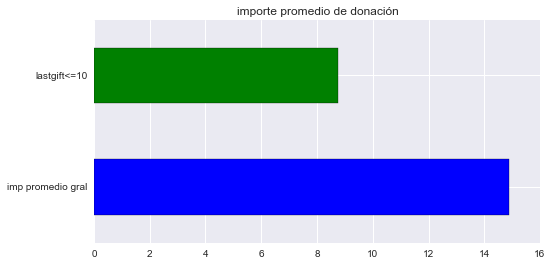

In [16]:
# graficando los resultados
lastgift = pd.Series({'imp promedio gral': donacion_prom, 
                      'lastgift<=10': lastgift10_imp})
plot=lastgift.plot(kind='barh', 
                   color=['blue', 'green']
                  ).set_title('importe promedio de donación')

Aquí vemos, que si bien las probabilidades de que sea un donador mejoran, el importe que se dona esta por debajo del promedio. En el caso de este atributo podemos ver que existe una [correlación](https://es.wikipedia.org/wiki/Correlaci%C3%B3n) inversa entre el importe de donación y la probabilidad de hacer una donación a la ONG.

Hasta aquí llegamos en este artículo, la idea es que luego, cuando tengamos armado el modelo, podamos jugar con distintas combinaciones de atributos y ver como se comporta el modelo hasta alcanzar la combinación ideal de atributos. No se pierdan los próximos artículos!

Saludos!

*Este post fue escrito utilizando IPython notebook. Pueden descargar este [notebook](https://github.com/relopezbriega/relopezbriega.github.io/blob/master/downloads/MachineLearningPractica2.ipynb) o ver su version estática en [nbviewer](http://nbviewer.ipython.org/github/relopezbriega/relopezbriega.github.io/blob/master/downloads/MachineLearningPractica2.ipynb).*